# Agriculture Project

**Machine Learning in Agriculture**

* Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with 
the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives 
machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and
high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in
agricultural operational environments.
* Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in
the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick 
up the harvest determining the ripeness with the help of computer vision

**Features Information**
* Estimated_Insects_Count: Estimated insects count per square meter
* Crop_Type: Category of Crop (0,1)
* Soil_Type: Category of Soil (0,1)
* Pesticide_Use_Category: Type os pesticides uses (1-Never, 2-Previously used, 3-Currently used)
* Number_Doses_Week: Number of doses per week
* Number_Weeks_Used: Number of weeks used
* Number_Weeks_Quit: Number of weeks Quit
* Season: Season Category(1,2,3)
* Crop_Damage: Crop_damage category(0=alive, 1=Damage due to the other causes, 2=Damage due to Pesticides)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Train dataset
df = pd.read_excel('train_agriculture.xlsx')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
# Test Dataset 
test = pd.read_excel('test_agriculture.xlsx')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [7]:
# ckecking shape of dataset
df.shape

(4599, 10)

In [9]:
# checking null value
df.isnull().sum() 
# 10 percent null values in 'Number_Weeks_Quit' 

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
# Impute null by groupby 'Season'
df['Number_Weeks_Used'].fillna(df.groupby(['Season'])['Number_Weeks_Used'].transform(lambda x: x.mode()[0]),inplace=True)

In [11]:
# check again null value after imputation
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
# drop 'ID' feature this is unique value
df.drop('ID', axis=1, inplace=True)

In [13]:
# checking statistical summary
df.describe()
# in this datset has most of features are categorical 

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.734508,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.054942,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


**Let's do Data Visualization**

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

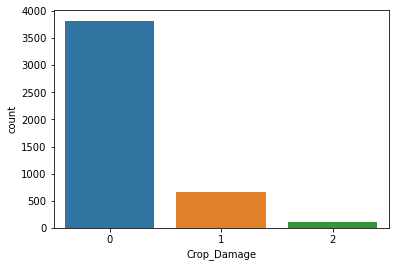

In [5]:
# counting different values of Taret
# Target is imbalanced 

print(df['Crop_Damage'].value_counts())
sns.countplot(df['Crop_Damage'])

# 0 =  alive, 1= crop damage due to other causes, 
# 2 = crop damage due to the pesticides 
#  about 2.5 percent crop-damaged due to pesticides and 14 percent crop-damaged due to other causes

0    3565
1    1034
Name: Crop_Type, dtype: int64


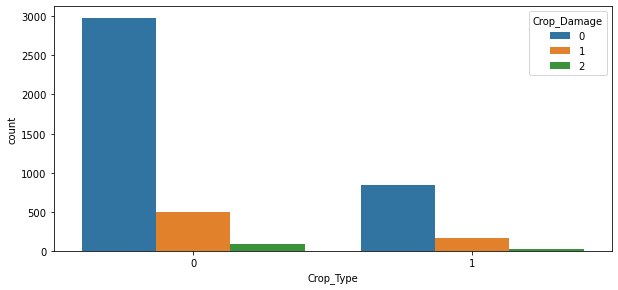

In [24]:
# let's check how 'Crop_Damaged' distributed with 'Crop_Type'

print(df['Crop_Type'].value_counts())
plt.figure(figsize=(10,4.5))
sns.countplot(df['Crop_Type'], hue=df['Crop_Damage'])
plt.show()
# Crop_Damaged distributed in same ratio in both 'Crop_Type' 

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


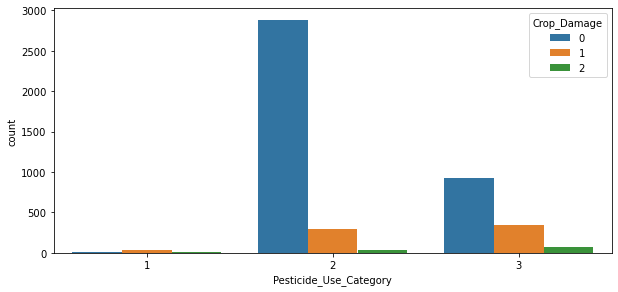

In [25]:
# plotting 'Pesticide_Use_Category' vs 'Crop_Damage'
print(df['Pesticide_Use_Category'].value_counts())  # Counting categorical feature values
plt.figure(figsize=(10,4.5))
sns.countplot(df['Pesticide_Use_Category'], hue=df['Crop_Damage'])
plt.show()

2    2327
1    1379
3     893
Name: Season, dtype: int64


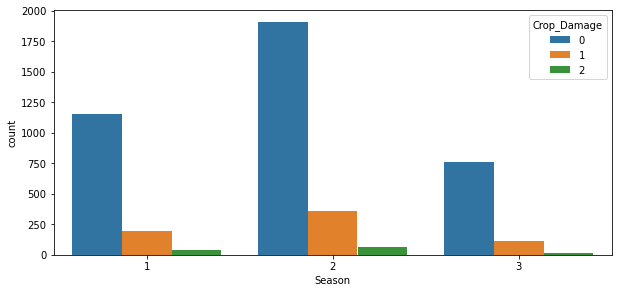

In [28]:
# plotting 'Season' vs 'Crop_Damage'
print(df['Season'].value_counts())  # Counting categorical feature values
plt.figure(figsize=(10,4.5))
sns.countplot(df['Season'], hue=df['Crop_Damage'])
plt.show()

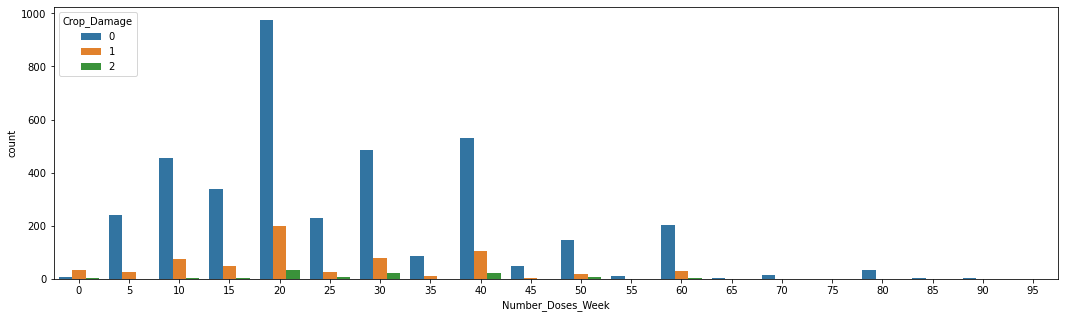

In [31]:
# plotting 'Number_Doses_Week' vs 'Crop_Damage'
plt.figure(figsize=(18,5))
sns.countplot(df['Number_Doses_Week'], hue=df['Crop_Damage'])
plt.show()

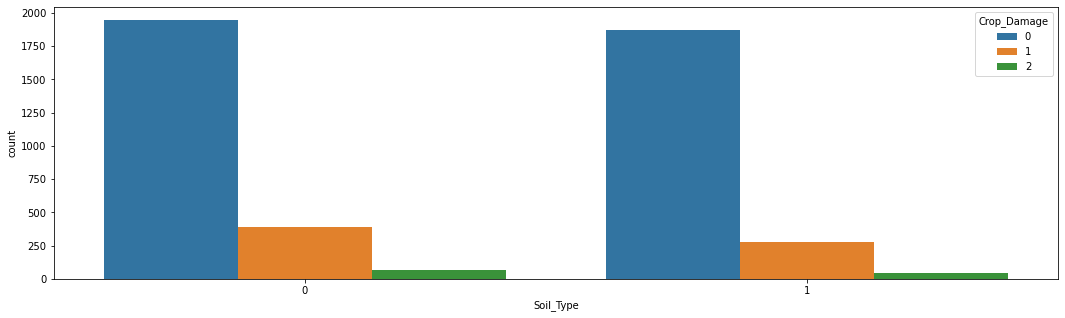

In [32]:
# plotting 'Soil_Type' vs 'Crop_Damage'
plt.figure(figsize=(18,5))
sns.countplot(df['Soil_Type'], hue=df['Crop_Damage'])
plt.show()

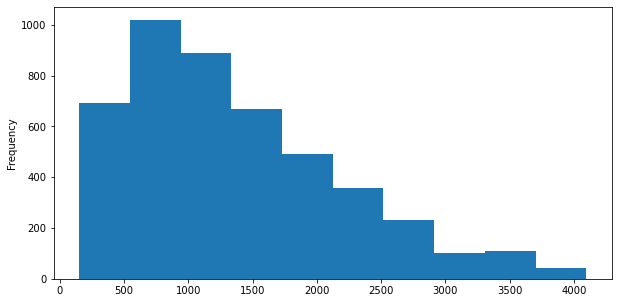

In [41]:
# let's check distribution
df['Estimated_Insects_Count'].plot( kind='hist', figsize=(10,5))
plt.show()

**This dataset has only categorical variable so i did not used Correlation heatmap & Boxplot**

**Skewness & Outliers are only used over continuous features so we didn't used these method**

**Checking Outliers**

<AxesSubplot:xlabel='Estimated_Insects_Count'>

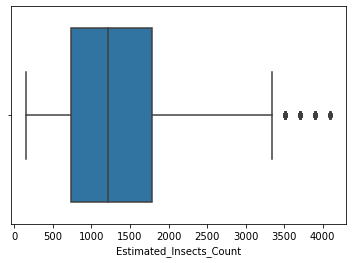

In [36]:
# looking some Outliers in this feature, only this feature is countinuous type 
sns.boxplot(df['Estimated_Insects_Count'])

In [44]:
# these datapoint are outliers according zscore or Boxplot method but dataset is not so large that I remove 140 datapoint
z = np.abs(zscore(df['Crop_Damage']))
np.where(z>3)

(array([   7,    9,   14,  103,  112,  149,  165,  166,  167,  179,  186,
         197,  207,  222,  223,  242,  248,  264,  265,  290,  296,  305,
         316,  351,  355,  361,  374,  377,  453,  458,  466,  480,  510,
         517,  522,  557,  595,  612,  634,  693,  819,  944,  980, 1067,
        1178, 1327, 1339, 1340, 1737, 1807, 2043, 2139, 2170, 2171, 2237,
        2585, 2590, 2663, 2671, 2696, 2710, 2716, 2723, 2767, 2792, 2796,
        2797, 2804, 2806, 2814, 2828, 2829, 2834, 2841, 2842, 2851, 2860,
        2861, 2870, 2884, 2888, 2912, 2915, 2917, 2921, 2923, 3015, 3045,
        3058, 3086, 3107, 3126, 3183, 3189, 3206, 3248, 3628, 3629, 3657,
        3686, 3716, 3717, 3718, 3740, 3796, 3850, 3851, 3935, 4091, 4155,
        4277, 4278, 4378, 4545, 4570], dtype=int64),)

**Let's start model building**

In [15]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [16]:
# Standardization the data
sc = StandardScaler()
scaled = sc.fit_transform(df[['Estimated_Insects_Count']])
df['Estimated_Insects_Count'] = scaled


In [47]:
# Divide the dataset into input & target feature
X = df.iloc[:, 1:-1]
y = df['Crop_Damage']

In [49]:
# Split the data into Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape

((3679, 7), (920, 7))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *
from sklearn.neural_network import MLPClassifier

**LogisticRegression**

In [68]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8304347826086956 
confusion_matrix :
 [[763   1   0]
 [132   1   0]
 [ 23   0   0]]
Classification_report :
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.50      0.01      0.01       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.44      0.34      0.31       920
weighted avg       0.76      0.83      0.76       920



**KNeighborsClassifier**

In [70]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8130434782608695 
confusion_matrix :
 [[737  27   0]
 [122  11   0]
 [ 19   4   0]]
Classification_report :
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       764
           1       0.26      0.08      0.13       133
           2       0.00      0.00      0.00        23

    accuracy                           0.81       920
   macro avg       0.37      0.35      0.34       920
weighted avg       0.73      0.81      0.76       920



**SVM Classifier**

In [71]:
svm= SVC()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8304347826086956 
confusion_matrix :
 [[764   0   0]
 [133   0   0]
 [ 23   0   0]]
Classification_report :
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.28      0.33      0.30       920
weighted avg       0.69      0.83      0.75       920



**RandomForest Classifier**

In [78]:
rf_c= RandomForestClassifier()
rf_c.fit(x_train, y_train)
pred = rf_c.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8141304347826087 
confusion_matrix :
 [[723  38   3]
 [106  25   2]
 [ 17   5   1]]
Classification_report :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       764
           1       0.37      0.19      0.25       133
           2       0.17      0.04      0.07        23

    accuracy                           0.81       920
   macro avg       0.46      0.39      0.41       920
weighted avg       0.77      0.81      0.78       920



**MLPClassifier**

In [66]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8402173913043478 
confusion_matrix :
 [[753  11   0]
 [113  20   0]
 [ 21   2   0]]
Classification_report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       764
           1       0.61      0.15      0.24       133
           2       0.00      0.00      0.00        23

    accuracy                           0.84       920
   macro avg       0.48      0.38      0.38       920
weighted avg       0.79      0.84      0.79       920



**AdaBoost Classifier**

In [67]:
ad_c= AdaBoostClassifier()
ad_c.fit(x_train, y_train)
pred = ad_c.predict(x_test)
print(f'accuracy_score : {accuracy_score(y_test, pred)} ')
print(f'confusion_matrix :\n {confusion_matrix(y_test, pred)}')
print(f'Classification_report :\n {classification_report(y_test, pred)}')

accuracy_score : 0.8369565217391305 
confusion_matrix :
 [[757   7   0]
 [119  13   1]
 [ 22   1   0]]
Classification_report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.62      0.10      0.17       133
           2       0.00      0.00      0.00        23

    accuracy                           0.84       920
   macro avg       0.49      0.36      0.36       920
weighted avg       0.79      0.84      0.78       920



**CROSS-VALIDATION**

In [79]:
kfold = KFold(n_splits=9, random_state=42, shuffle=True)

# KNN classifier
print(f'cross_validation_score with KNN-Classifier: {cross_val_score(knn ,x_train,y_train,cv= kfold).mean()}\n')  
# SVM Classifier 
print(f'cross_validation_score with SVM-Classifier: {cross_val_score(svm ,x_train,y_train,cv= kfold).mean()}\n')  
#  AdaBoost-Classifier
print(f'cross_validation_score with AdaBoost-Classifier: {cross_val_score(ad_c ,x_train,y_train, cv=kfold).mean()}\n')  
# RandomForest Classifier
print(f'cross_validation_score with RandomForest: {cross_val_score(rf_c,x_train,y_train, cv = kfold ).mean()}\n')
# MLPCLassifier
print(f'cross_validation_score with MLPClassifier: {cross_val_score(mlp, x_train,y_train, cv = kfold ).mean()}')


cross_validation_score with KNN-Classifier: 0.8216916758553462

cross_validation_score with SVM-Classifier: 0.8306619578013221

cross_validation_score with AdaBoost-Classifier: 0.8333806084237554

cross_validation_score with RandomForest: 0.8067447571258876

cross_validation_score with MLPClassifier: 0.8317492848810266


In [ ]:
# we can see above cross-validation score and we get 2-3 % difference in accuracy-score among the models 

**Let's use Hyperparameter-Tuning**

In [76]:
#  HYPERPARAMATER TUNING        '''' RANDOMFOREST-classification''''
from sklearn.model_selection import GridSearchCV

param= {'n_estimators':[100,180, 380],'max_depth':[7,9,11,17] ,'min_samples_split':[2,3],'criterion':['gini','entropy'] }
gcv = GridSearchCV(rf_c ,param, cv=kfold,n_jobs=-1)

gcv.fit(x_train,y_train)
print('best_parameter=', gcv.best_params_ ,'\n')


Grid_RF = gcv.best_estimator_
Grid_RF.fit(x_train, y_train)
pred = Grid_RF.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')

best_parameter= {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 180} 

accuracy_score= 0.8347826086956521
classification_report 
                precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.56      0.07      0.12       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.47      0.35      0.34       920
weighted avg       0.78      0.83      0.77       920
 



In [83]:
#  HYPERPARAMATER TUNING        '''MLP-classification''
mlp_c = MLPClassifier()
param= {'hidden_layer_sizes':[70,130,100],'activation':['tanh','relu'],'learning_rate':['constant','adaptive'] ,
        'alpha':[0.001,0.0001],'learning_rate_init':[0.1,0.001,0.0019] }
gsv = GridSearchCV(mlp_c ,param, cv=kfold, n_jobs=-1)

gsv.fit(x_train,y_train)
print('best_parameter=', gsv.best_params_ ,'\n')

Grid_mlp = gsv.best_estimator_
Grid_mlp.fit(x_train, y_train)
pred = Grid_mlp.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report: \n ', classification_report(y_test, pred))
print('confusion-matrix: \n', confusion_matrix(y_test, pred))

best_parameter= {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.1} 

accuracy_score= 0.8326086956521739
classification_report: 
                precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.75      0.02      0.04       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.53      0.34      0.32       920
weighted avg       0.80      0.83      0.76       920

confusion-matrix: 
 [[763   1   0]
 [130   3   0]
 [ 23   0   0]]


In [ ]:
**Hyperparameter tunning with 

In [84]:
#  HYPERPARAMATER TUNING        '''AdaBoost-classification''
ad_c = AdaBoostClassifier()
param= {'n_estimators':[70,130,210],'learning_rate':[1.0,0.1,0.001,0.39]}
gsv = GridSearchCV(ad_c ,param, cv=kfold, n_jobs=-1)

gsv.fit(x_train,y_train)
print('best_parameter=', gsv.best_params_ ,'\n')

Grid_ad = gsv.best_estimator_
Grid_ad.fit(x_train, y_train)
pred = Grid_ad.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report: \n ', classification_report(y_test, pred))
print('confusion-matrix: \n', confusion_matrix(y_test, pred))

best_parameter= {'learning_rate': 0.1, 'n_estimators': 130} 

accuracy_score= 0.8336956521739131
classification_report: 
                precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.80      0.03      0.06       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.54      0.34      0.32       920
weighted avg       0.81      0.83      0.76       920

confusion-matrix: 
 [[763   1   0]
 [129   4   0]
 [ 23   0   0]]


* Dataset has three multiclass target value and class value distribution ratio is 80:15:5 so huge diffences 
  therfore accuracy-score would be affected
  
* Accuracy_sscore could have been improved but multiclass target is imbalanced and bigger differnces in class distribution
* From MLPClassifier, AdaboostClassifier and RansdomForestClassifier we get about 83-84 percent accuracy-score